### Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### About Dataset
Total no. of attributes:16 No .of instances:309 Attribute information: Gender: M(male), F(female) Age: Age of the patient Smoking: YES=2, NO=1. Yellow fingers: YES=2, NO=1. Anxiety: YES=2, NO=1. Peer_pressure: YES=2 , NO=1. Chronic Disease: YES=2, NO=1. Fatigue: YES=2 , NO=1. Allergy: YES=2, NO=1. Wheezing: YES=2, NO=1. Alcohol: YES=2, NO=1. Coughing: YES=2, NO=1. Shortness of Breath: YES=2, NO=1. Swallowing Difficulty: YES=2, NO=1. Chest pain: YES=2, NO=1. Lung Cancer: YES, NO.

In [4]:
#Reading the csv
df = pd.read_csv('/content/lung_cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [5]:
#Keeping a copy
df1 = df.copy()

### Data Cleaning & Transformation

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
df['GENDER'] = df['GENDER'].map({'F': 0, 'M': 1})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

In [8]:
#df.head()

In [9]:
#df.describe()

In [10]:
df['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64

In [11]:
#Checking for duplicates
df.duplicated().sum()

33

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    238
0     38
Name: count, dtype: int64

### Data Visualization

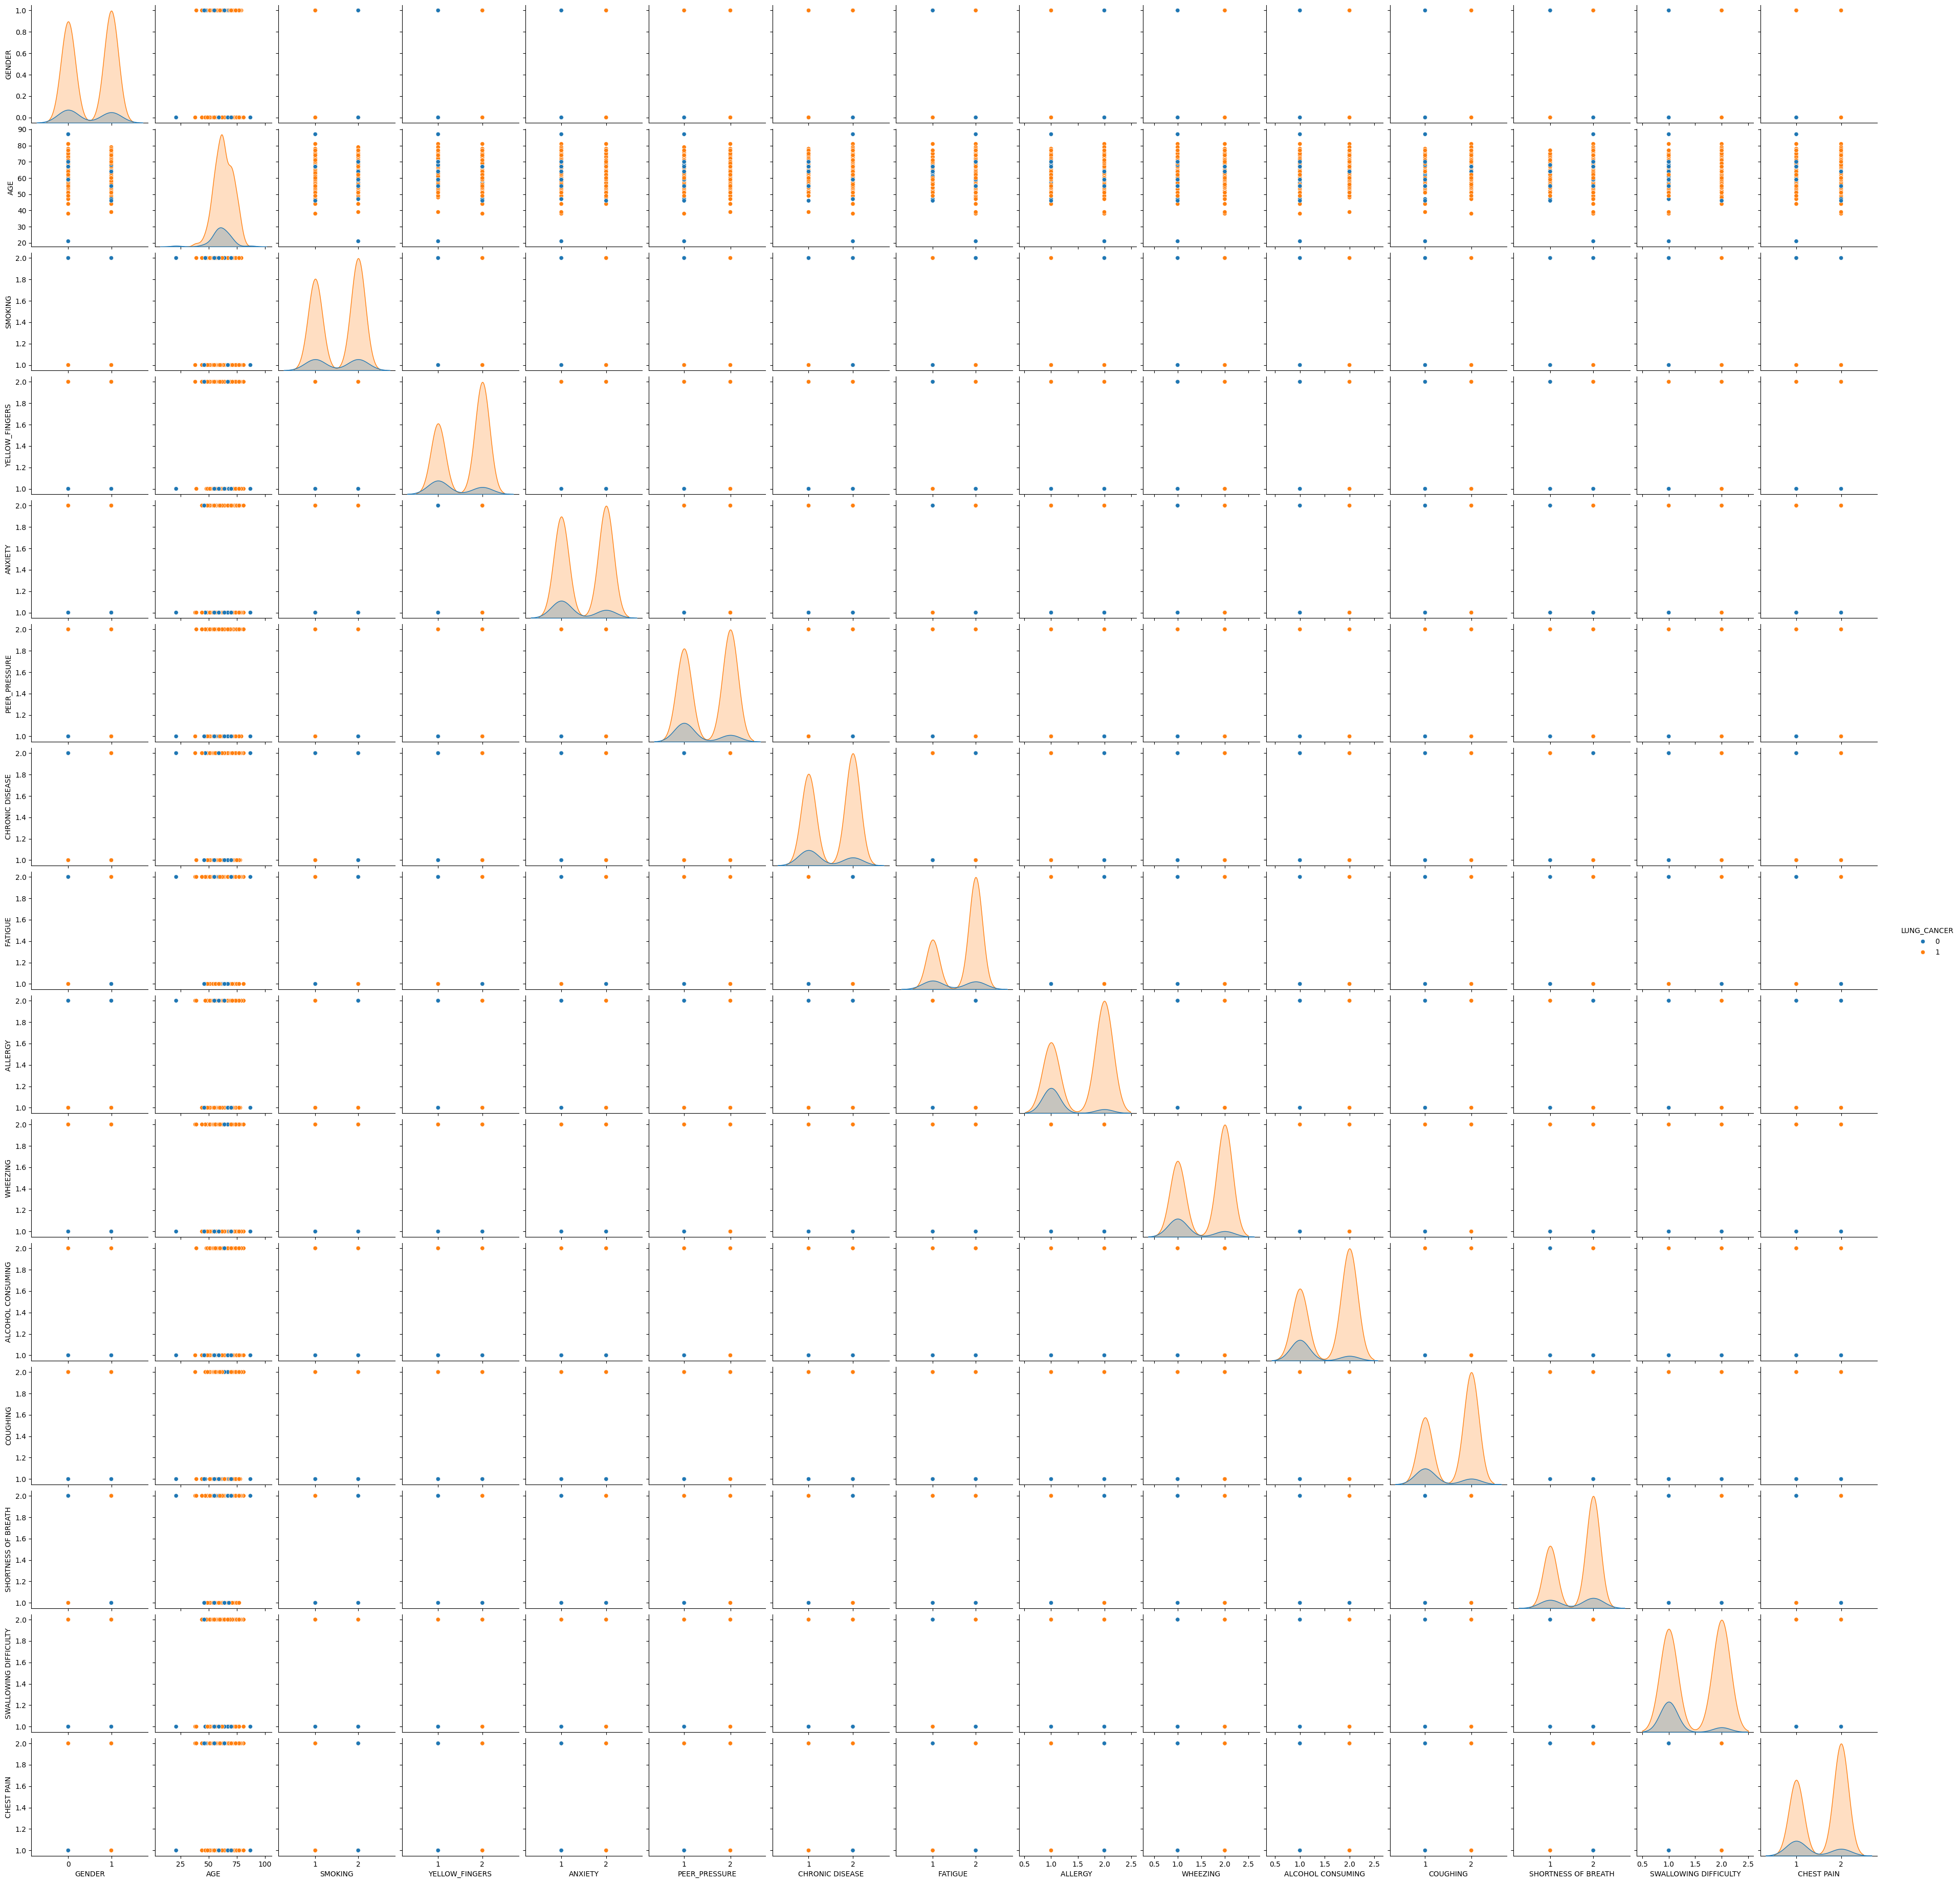

In [14]:
sns.pairplot(df,hue='LUNG_CANCER')

In [15]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

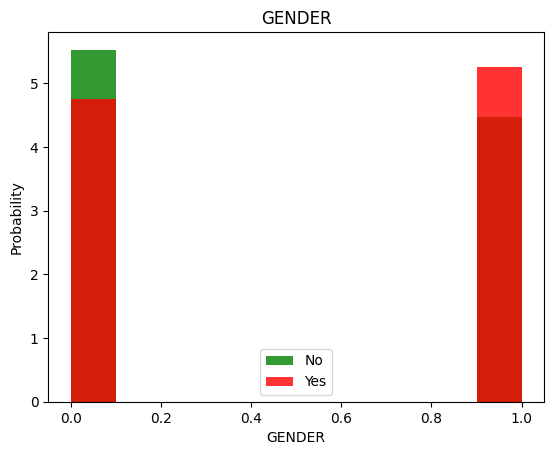

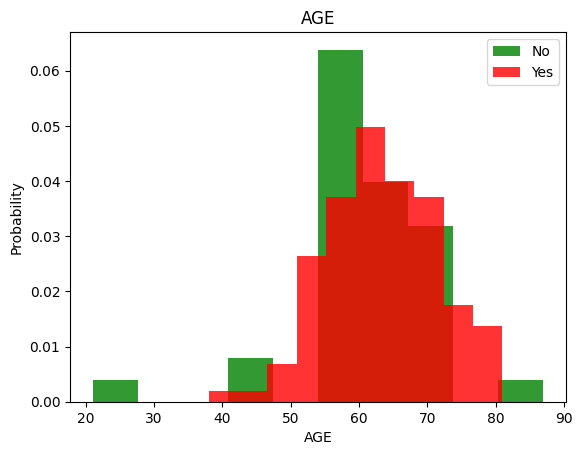

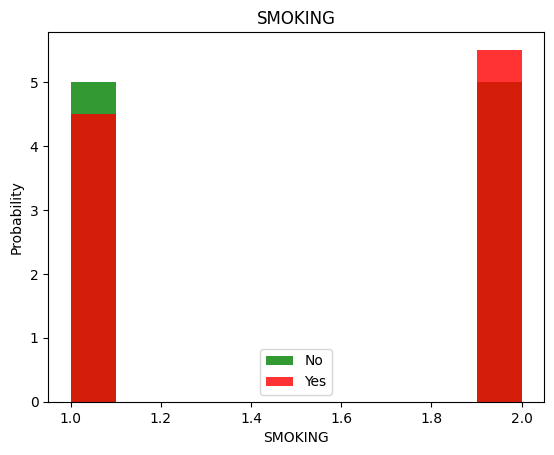

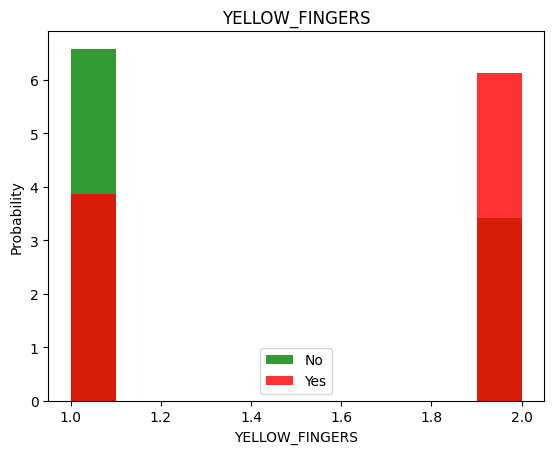

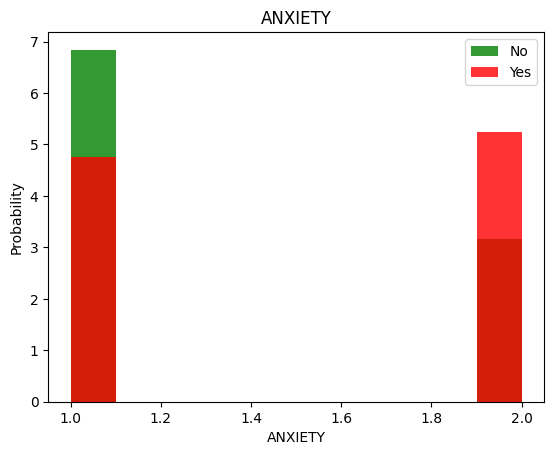

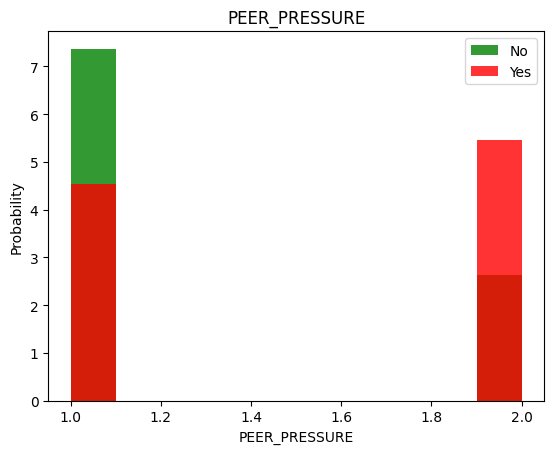

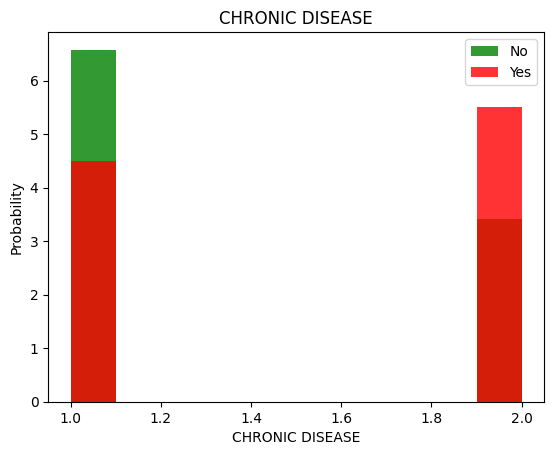

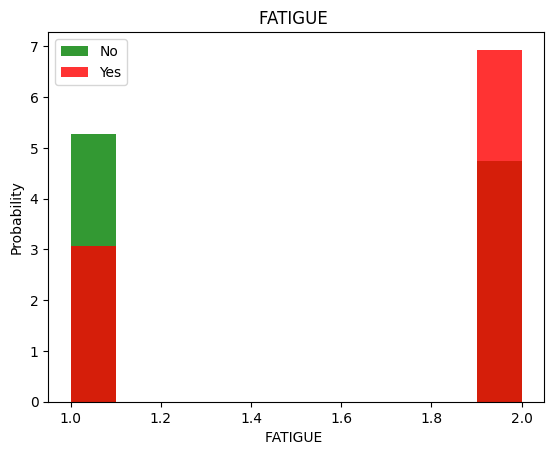

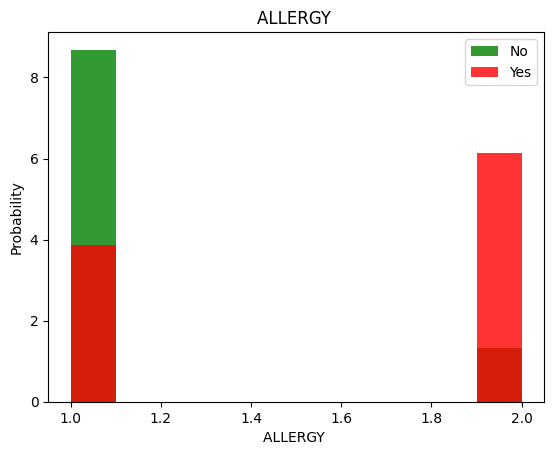

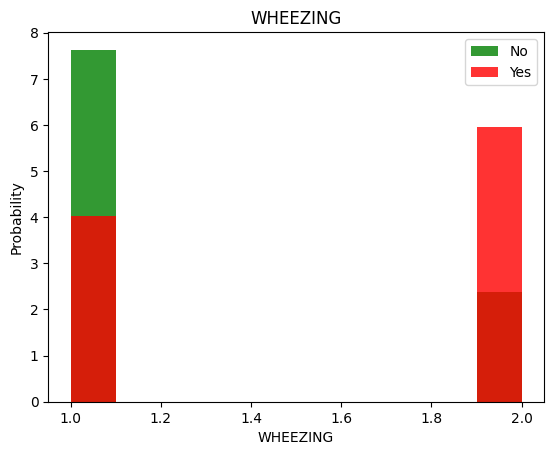

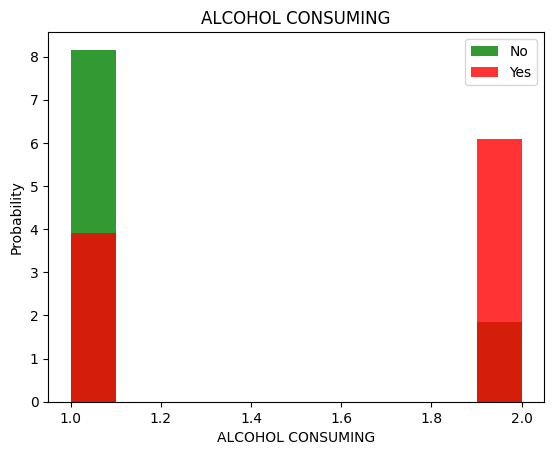

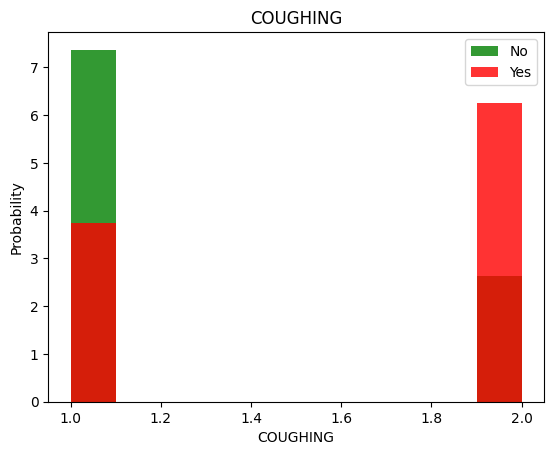

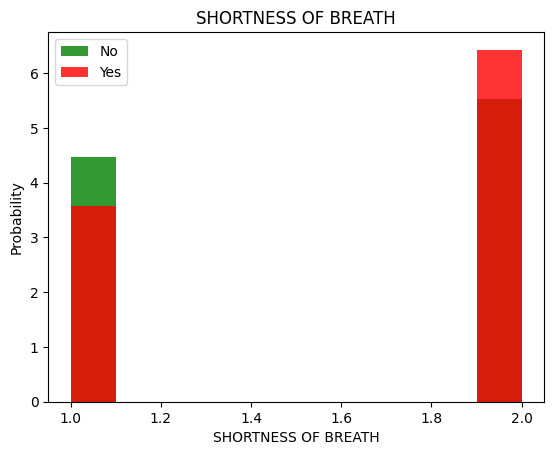

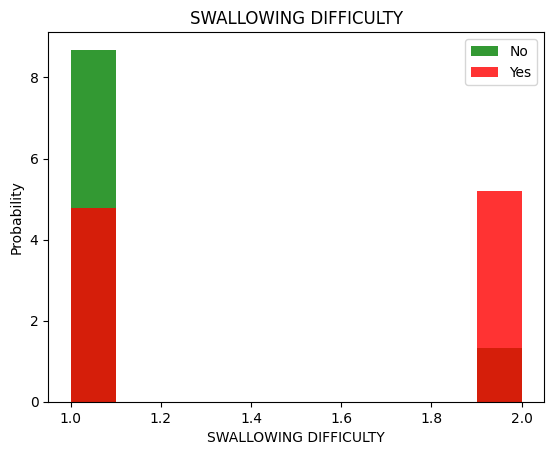

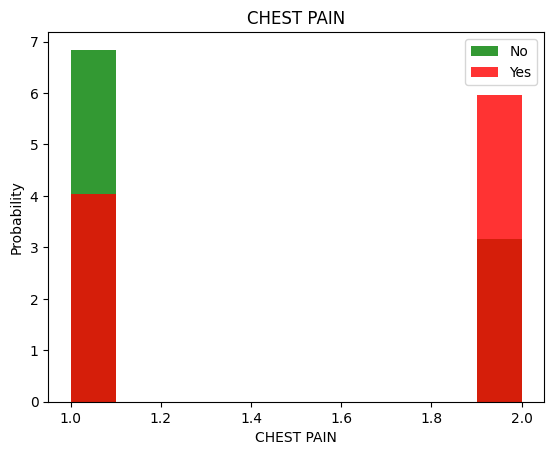

In [19]:
cols = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

for label in cols[:-1]:
  plt.hist(df[df['LUNG_CANCER'] == 0][label], color = 'green', label = 'No', alpha = 0.8, density = True)
  plt.hist(df[df['LUNG_CANCER'] == 1][label], color = 'red', label = 'Yes', alpha = 0.8, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

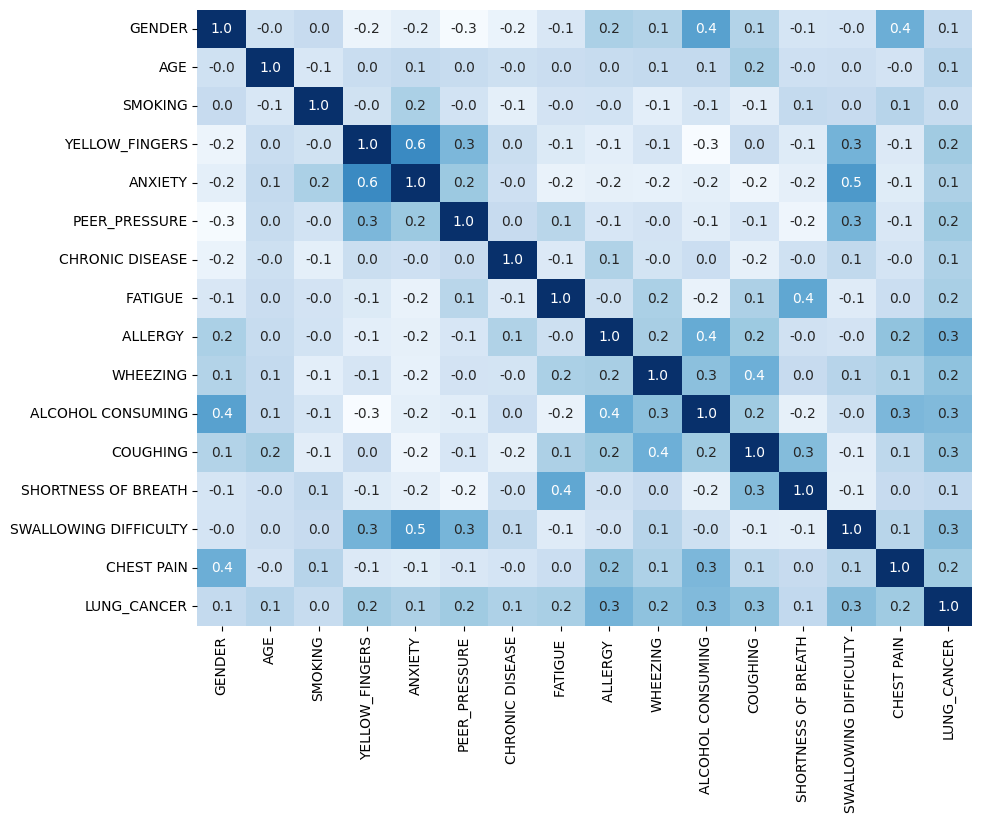

In [20]:
# Visualizing the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cbar=False,cmap='Blues',fmt='.1f')
plt.show()

In [21]:
# Data splitting
X = df.drop(['LUNG_CANCER'], axis = 1)
#X

In [22]:
Y = df['LUNG_CANCER']

In [23]:
X.shape

(276, 15)

In [24]:
Y.shape

(276,)

### Over Sampling & Scaling

In [25]:
from imblearn.over_sampling import RandomOverSampler

over_samp =  RandomOverSampler(random_state=0)
X_res, Y_res = over_samp.fit_resample(X, Y)
X_res.shape, Y_res.shape

((476, 15), (476,))

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)

### Splitting the dataset

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, stratify = Y_res, test_size = 0.2, random_state = 0)

### Model Creation

### KNN_Model

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print( classification_report(Y_test, knn_model.predict(X_test)))
print( accuracy_score(Y_test, knn_model.predict(X_test)))
print()

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        48
           1       1.00      0.92      0.96        48

    accuracy                           0.96        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.96      0.96      0.96        96

0.9583333333333334



### SVM_Model

In [31]:
from sklearn.svm import SVC

In [32]:
svc_model = SVC()
svc_model.fit(X_train, Y_train)

SVC()

In [33]:
print( classification_report(Y_test, svc_model.predict(X_test)))
print( accuracy_score(Y_test, svc_model.predict(X_test)))
print()

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        48
           1       1.00      0.92      0.96        48

    accuracy                           0.96        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.96      0.96      0.96        96

0.9583333333333334



### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state = 0)
log_model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [35]:
print( classification_report(Y_test, log_model.predict(X_test)))
print( accuracy_score(Y_test, log_model.predict(X_test)))
print()

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        48
           1       0.93      0.90      0.91        48

    accuracy                           0.92        96
   macro avg       0.92      0.92      0.92        96
weighted avg       0.92      0.92      0.92        96

0.9166666666666666



### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [37]:
print( classification_report(Y_test, tree_model.predict(X_test)))
print( accuracy_score(Y_test, tree_model.predict(X_test)))
print()

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        48
           1       1.00      0.94      0.97        48

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96

0.96875



### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=100)
forest_model.fit(X_train, Y_train)

RandomForestClassifier()

In [39]:
print( classification_report(Y_test, forest_model.predict(X_test)))
print( accuracy_score(Y_test, forest_model.predict(X_test)))
print()

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        48
           1       1.00      0.92      0.96        48

    accuracy                           0.96        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.96      0.96      0.96        96

0.9583333333333334



In [40]:
#Saving the model for later use
import pickle

filename = 'lung_cancer_model.pkl'
pickle.dump(tree_model, open(filename, 'wb'))

In [41]:
# Saving the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)